<a href="https://colab.research.google.com/github/hirofsgit/Python_1/blob/main/Chap7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 55.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=03481fecc79e1418bf9711c0a401bab97ed8190d91d1f288f1101973c67984a5
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import math
from scipy.stats import beta
from math import factorial, log
from scipy import special, optimize
%matplotlib inline

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

# 7.1

分散Bの確認

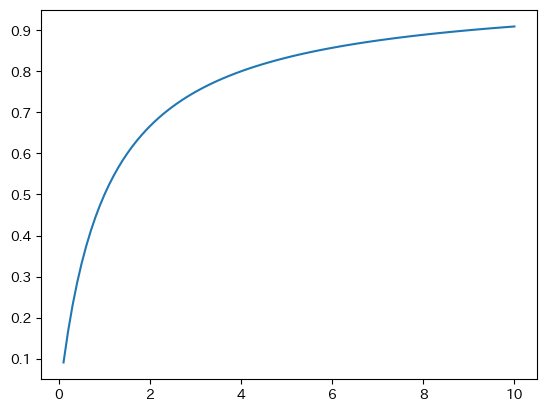

In [ ]:
x=np.linspace(0.1,10,100)
y=x/(x+1)
plt.plot(x,y)

# 7.2

## 表7.1

In [ ]:
a = range(1,19)
mle = [0.345,0.333,0.322,0.311,0.289,0.289,0.278,0.255,0.244,0.233,0.233,0.222,0.222,0.222,0.211,0.211,0.200,0.145]
baseball = pd.DataFrame({'MLE':mle},index=a)

In [ ]:
p = baseball['MLE']
p_bar = p.mean().round(3)

In [ ]:
sigma_0 = p_bar * (1-p_bar)/90

In [ ]:
N = 18
p_js = p_bar + (1 - (N-3)*sigma_0/sum((p - p_bar)**2))*(p-p_bar)

In [ ]:
baseball['JS'] = p_js

In [ ]:
 truth = [0.298,0.346,0.222,0.276,0.263,0.273,0.303,0.270,0.230,0.264,0.264,0.210,0.256,0.269,0.316,0.226,0.285,0.200]

In [ ]:
baseball['TRUTH'] = truth

In [ ]:
n=90
x = 2*(np.sqrt(n + 0.5))*np.arcsin(np.sqrt((n*p + 0.375)/(n+0.75)))

In [ ]:
baseball['x'] = x

In [ ]:
baseball

,MLE,JS,TRUTH,x
1,0.345,0.285,0.298,11.970
2,0.333,0.281,0.346,11.731
3,0.322,0.277,0.222,11.511
4,0.311,0.273,0.276,11.288
5,0.289,0.266,0.263,10.835
6,0.289,0.266,0.273,10.835
7,0.278,0.262,0.303,10.606
8,0.255,0.254,0.270,10.116
9,0.244,0.251,0.230,9.877
10,0.233,0.247,0.264,9.634


In [ ]:
baseball.to_csv('/content/drive/MyDrive/baseball.csv')

In [ ]:
baseball = pd.read_csv('/content/baseball.csv', index_col=0)
baseball.head()

,MLE,JS,TRUTH,x
1,0.345,0.285,0.298,11.970
2,0.333,0.281,0.346,11.731
3,0.322,0.277,0.222,11.511
4,0.311,0.273,0.276,11.288
5,0.289,0.266,0.263,10.835


## 図7.1

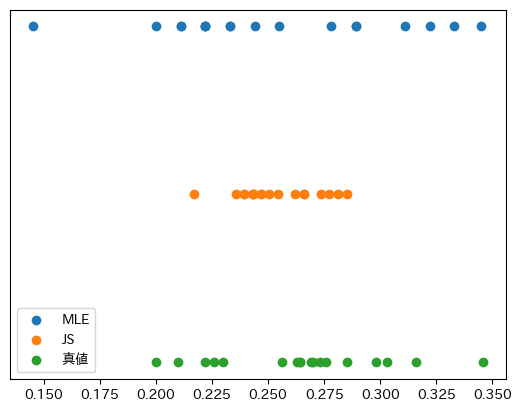

In [ ]:
plt.scatter(x=baseball['MLE'], y=[1]*18, label='MLE')
plt.scatter(x=baseball['JS'], y=[0]*18, label='JS')
plt.scatter(x=baseball['TRUTH'], y=[-1]*18, label='真値')
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.legend()

In [ ]:
p_bar = baseball['MLE'].mean()

In [ ]:
p_bar

0.2536111111111111

In [ ]:
np.linalg.norm(baseball['TRUTH'] - p_bar)**2

0.026610499999999992

In [ ]:
N = 18
p = baseball['MLE']
sigma_0 = p_bar * (1-p_bar)/90
B_hat =  1 - (N-3)*sigma_0/sum((p - p_bar)**2)

In [ ]:
B_hat

0.3422996606596531

# 7.3

## 表７.2

糖尿病の研究におけるn=442人の患者のうちの最初の7人。

 age, sex, ..., gluからなる10個の基本ん計測項目により、1年後の疾病進行progを予測する

In [ ]:
diabetes = pd.read_csv('/content/diabetes.csv',index_col=0)

In [ ]:
diabetes

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,prog
1,59,1,32.100,101.000,157,93.200,38.000,4.000,2.111,87,151
2,48,0,21.600,87.000,183,103.200,70.000,3.000,1.690,69,75
3,72,1,30.500,93.000,156,93.600,41.000,4.000,2.029,85,141
4,24,0,25.300,84.000,198,131.400,40.000,5.000,2.124,89,206
5,50,0,23.000,101.000,192,125.400,52.000,4.000,1.863,80,135
...,...,...,...,...,...,...,...,...,...,...,...
438,60,1,28.200,112.000,185,113.800,42.000,4.000,2.164,93,178
439,47,1,24.900,75.000,225,166.000,42.000,5.000,1.929,102,104
440,60,1,24.900,99.667,162,106.600,43.000,3.770,1.792,95,132
441,36,0,30.000,95.000,201,125.200,42.000,4.790,2.228,85,220


## 図7.2

In [ ]:
X = diabetes.drop('prog',axis=1)
y = diabetes['prog']

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [ ]:
n=len(X_train)

X_train_sc = (X_train - X_train.mean())/(np.sqrt(n-1) * X_train.std())
X_test_sc = (X_test - X_train.mean())/(np.sqrt(n-1) * X_train.std())
y_train_sc = y_train - y_train.mean()
y_test_sc = y_test - y_train.mean()

In [ ]:
S = X_train_sc.T @ X_train_sc
S

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
age,1.000,0.189,0.167,0.344,0.273,0.240,-0.102,0.240,0.264,0.288
sex,0.189,1.000,0.051,0.218,0.045,0.143,-0.354,0.317,0.142,0.227
bmi,0.167,0.051,1.000,0.386,0.262,0.264,-0.367,0.422,0.451,0.393
map,0.344,0.218,0.386,1.000,0.276,0.248,-0.255,0.328,0.397,0.390
tc,0.273,0.045,0.262,0.276,1.000,0.890,0.055,0.533,0.523,0.297
ldl,0.240,0.143,0.264,0.248,0.890,1.000,-0.200,0.645,0.318,0.287
hdl,-0.102,-0.354,-0.367,-0.255,0.055,-0.200,1.000,-0.739,-0.400,-0.354
tch,0.240,0.317,0.422,0.328,0.533,0.645,-0.739,1.000,0.632,0.483
ltg,0.264,0.142,0.451,0.397,0.523,0.318,-0.400,0.632,1.000,0.452
glu,0.288,0.227,0.393,0.390,0.297,0.287,-0.354,0.483,0.452,1.000


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
alpha_vals = [i * 1.0 / 100 for i in range(0, 26)]

In [ ]:
skl_model = Ridge(alpha=0.0, fit_intercept=False)
skl_model.fit(X_train_sc, y_train_sc)

Ridge(alpha=0.0, fit_intercept=False)

In [ ]:
paths = np.zeros((X_train_sc.shape[1], len(alpha_vals)))
for i, alpha in enumerate(alpha_vals):
    model = Ridge(alpha=alpha, fit_intercept=False)
    model.fit(X_train_sc, y_train_sc)
    paths[:, i] = model.coef_

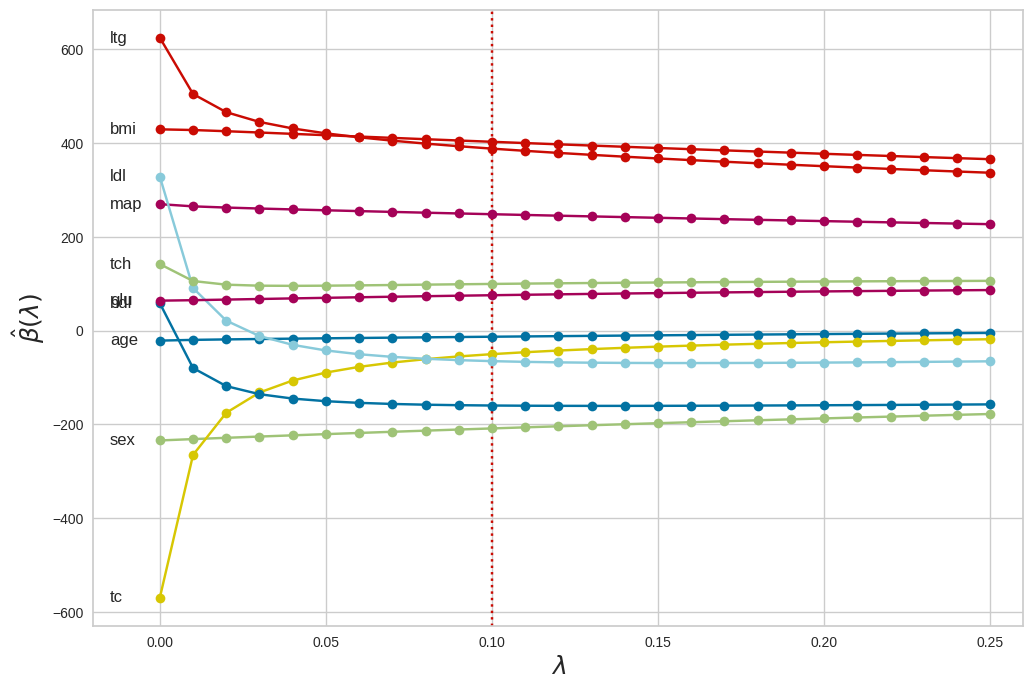

In [ ]:
x_columns = [col for col in diabetes.columns if col != "prog"]
fig, ax = plt.subplots(figsize=(12, 8))

ax.axvline(0.10, c="r", linestyle=":")

for column, line in zip(x_columns, paths):
    ax.plot(alpha_vals, line, "o-")
    ax.text(-0.015, line[0], column, verticalalignment="center")

ax.set_xlabel(r"$\lambda$", size=18)
ax.set_ylabel(r"$\hat{\beta}(\lambda)$", size=18)

ax.set_xlim(-0.02, 0.26);

### 最適なlamdaを求める

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
ridge_cv = RidgeCV(fit_intercept=False)

In [ ]:
ridge_cv.fit(X_train_sc, y_train_sc)

RidgeCV(fit_intercept=False)

In [ ]:
ridge_cv.alpha_

0.1

In [ ]:
from yellowbrick.regressor import AlphaSelection

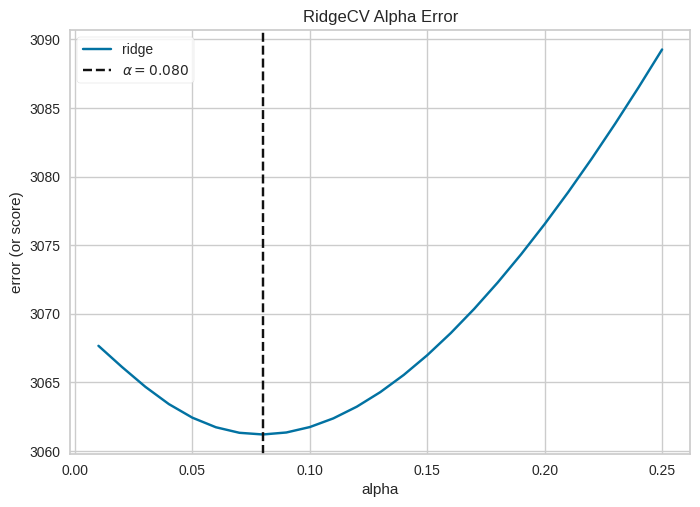

In [ ]:
alphas = [i * 1.0 / 100 for i in range(1, 26)]

# 訓練データを交差検証し、最適な alpha を求める
ridgeCV = RidgeCV(alphas = alphas)

# alpha をプロットする
visualizer = AlphaSelection(ridgeCV)
visualizer.fit(X_train_sc, y_train_sc)

visualizer.show()
plt.show()

In [ ]:
# Ridge回帰のインスタンスを作成
ridge = Ridge(alpha = 0.085)

# 訓練データからモデルを生成（最小二乗法＋正則化項）
ridge.fit(X_train_sc, y_train_sc)

# 切片を出力
print(ridge.intercept_)

# 回帰係数（傾き）を出力
print(ridge.coef_)

-3.957049891258458e-14
[ -13.92702199 -212.04336884  406.84103407  250.70338897  -57.76284233
  -61.54256894 -158.48820277   98.47188356  395.98869401   73.97372542]


In [ ]:
y_pre = ridge.predict(X_test_sc)
error = (np.linalg.norm(y_pre - y_test_sc))**2
print('error = ', error)

error =  380298.3972456166


### ブートストラップ法で標準誤差を求める

In [ ]:
Xy = pd.concat([X_train,y_train], axis = 1)

In [ ]:
alphas = [i * 1.0 / 100 for i in range(1, 26)]
lamdas = []
ridge0_b = []
ridge1_b = []
for i in range(1000):
  data = Xy.sample(n=len(Xy), replace = True)
  dX = data.drop('prog',axis=1)
  dy = data['prog']
  n=len(dX)
  dX_sc = (dX - dX.mean())/(np.sqrt(n-1) * dX.std())
  dy_sc = dy - dy.mean()
  ridgeCV = RidgeCV(alphas = alphas)
  ridgeCV.fit(dX_sc,dy_sc)
  lamdas.append(ridgeCV.alpha_)
  ridge0 = Ridge(alpha = 0)
  ridge1 = Ridge(alpha = 0.1)
  ridge0.fit(dX,dy)
  ridge0_b.append(ridge0.coef_)
  ridge1.fit(dX,dy)
  ridge1_b.append(ridge1.coef_)

print('best lamda = ',np.mean(lamdas))

best lamda =  0.04973


## 表7.3

In [ ]:
beta0 = []
beta1 = []
for i in range(paths.shape[0]):
  beta0.append(paths[i][0])
  beta1.append(paths[i][10])

In [ ]:
std0 = np.std(ridge0_b,axis=0,ddof=1)/np.sqrt(1000)
std1 =np.std(ridge1_b,axis=0,ddof=1)/np.sqrt(1000)

In [ ]:
df = pd.DataFrame({'β^(0)' : beta0 , 'β^(0.1)' : beta1, 'std(0)':std0 , 'std(0.1)':std1} ,index = x_columns)

In [ ]:
df

,β^(0),β^(0.1),std(0),std(0.1)
age,-21.257,-12.963,0.008,0.008
sex,-234.161,-208.509,0.209,0.208
bmi,429.247,402.700,0.030,0.030
map,269.747,248.278,0.008,0.008
tc,-569.518,-50.123,0.020,0.018
ldl,328.473,-65.021,0.017,0.016
hdl,58.471,-159.654,0.027,0.026
tch,141.903,99.599,0.222,0.222
ltg,624.620,388.139,1.230,1.140
glu,63.937,75.521,0.010,0.010


もしかしたら標準偏差かもしれない

In [ ]:
sigma = 54.1
lam1 = 0.1
lam0 = 0
cov_lam1 = sigma * np.linalg.inv(S + lam1*np.eye(len(S)))*S*np.linalg.inv(S+lam1*np.eye(len(S)))
cov_lam0 = sigma * np.linalg.inv(S + lam0*np.eye(len(S)))*S*np.linalg.inv(S+lam0*np.eye(len(S)))

In [ ]:
sd1 = np.diag(cov_lam1)
sd1

array([  62.92450418,   63.17130722,   86.31617023,   82.67332473,
       1323.66061686,  855.81893042,  432.49791959,  720.88722954,
        232.93009397,   90.6875679 ])

In [ ]:
sd0 = np.diag(cov_lam0)
sd0

array([8.09491299e+01, 8.22597225e+01, 1.19573077e+02, 1.14649695e+02,
       1.99086682e+05, 8.15604068e+04, 1.48333418e+04, 4.14900526e+03,
       5.95464916e+03, 1.24833077e+02])

# 7.4

## 表7.4

最尤推定量の2乗平方根誤差

In [ ]:
n = 90
p = baseball['TRUTH']
p_star_list =[]
mle_error = []
for i in range(1,19):
  p_star = np.random.binomial(n, p[i], 1000)/90
  p_star_list.append(p_star)
  mle_error.append(np.sqrt(np.linalg.norm(p_star - p[i])**2))

In [ ]:
df = pd.DataFrame({'TRUTH':p, 'rmsMLE':mle_error}, index = range(1,19))

In [ ]:
df

,TRUTH,rmsMLE
1,0.298,1.490
2,0.346,1.635
3,0.222,1.392
4,0.276,1.470
5,0.263,1.459
6,0.273,1.461
7,0.303,1.582
8,0.270,1.458
9,0.230,1.395
10,0.264,1.421


In [ ]:
np.shape(p_star_list)

(18, 1000)

In [ ]:
np.array(p_star_list)[:,0]

array([0.32222222, 0.33333333, 0.23333333, 0.2       , 0.3       ,
       0.28888889, 0.31111111, 0.24444444, 0.2       , 0.33333333,
       0.23333333, 0.17777778, 0.28888889, 0.27777778, 0.28888889,
       0.2       , 0.23333333, 0.22222222])

In [ ]:
N = 18
p_star_bar = np.mean(p_star_list, axis = 0)
pp = []
for j in range(1000):
  sigma_0 = p_star_bar[j] * (1-p_star_bar[j])/90
  p_js = p_star_bar[j] + (1 - (N-3)*sigma_0/sum((np.array(p_star_list)[:,j] - p_star_bar[j])**2))*(np.array(p_star_list)[:,j]-p_star_bar[j])
  pp.append(p_js)

In [ ]:
np.shape(p_star_bar)

(1000,)

In [ ]:
rmsjs = [np.sqrt(np.linalg.norm(np.array(pp)[:,i-1] - p[i])**2) for i in range(1,19) ]

In [ ]:
df['rmsJS'] = rmsjs

In [ ]:
df

,TRUTH,rmsMLE,rmsJS
1,0.298,1.490,1.025
2,0.346,1.635,1.801
3,0.222,1.392,1.116
4,0.276,1.470,0.819
5,0.263,1.459,0.767
6,0.273,1.461,0.774
7,0.303,1.582,1.117
8,0.270,1.458,0.762
9,0.230,1.395,0.976
10,0.264,1.421,0.747


In [ ]:
sigma_0 = p_star_bar * (1-p_star_bar)/90
np.shape(sigma_0)

(1000,)

In [ ]:
np.shape(np.array(pp)[:,1])

(1000,)

In [ ]:
np.shape(np.array(p_star_list)[1,:])

(1000,)

In [ ]:
pijs1_list = []
sigma_0 = p_star_bar * (1-p_star_bar)/90
for i in range(1,19):
  pijs1_list_i = []
  for j in range(1000):
    pijs1 = min(max(np.array(pp)[j,i-1],np.array(p_star_list)[i-1,j]-np.sqrt(sigma_0[j])), np.array(p_star_list)[i-1,j] + np.sqrt(sigma_0[j]))
    pijs1_list_i.append(pijs1)
  pijs1_list.append(pijs1_list_i)

In [ ]:
np.shape(pijs1_list[1])

(1000,)

In [ ]:
rmsjs1 = [np.sqrt(np.linalg.norm(pijs1_list[i-1] - p[i])**2) for i in range(1,19)]

In [ ]:
df['rmsJS1'] = rmsjs1

In [ ]:
df

,TRUTH,rmsMLE,rmsJS,rmsJS1
1,0.298,1.490,1.025,1.043
2,0.346,1.635,1.801,1.706
3,0.222,1.392,1.116,1.104
4,0.276,1.470,0.819,0.850
5,0.263,1.459,0.767,0.809
6,0.273,1.461,0.774,0.813
7,0.303,1.582,1.117,1.133
8,0.270,1.458,0.762,0.808
9,0.230,1.395,0.976,0.985
10,0.264,1.421,0.747,0.785


In [ ]:
df.to_csv('/content/table7_4.csv')

## 図7.3

In [ ]:
np.shape(p_star_list)

(18, 1000)

In [ ]:
np.shape(np.array(pp)[:,1])

(1000,)

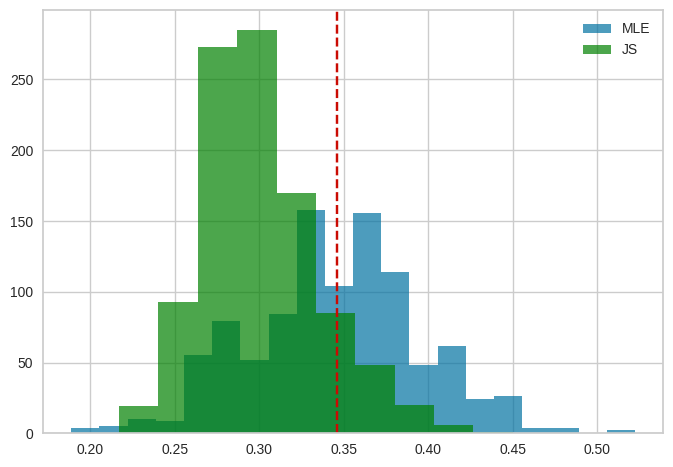

In [ ]:
plt.hist(np.array(p_star_list)[1], alpha=0.7, label = 'MLE', bins=20)
plt.hist(np.array(pp)[:,1], label='JS' , alpha=0.7, color="green", bins=10 )
plt.axvline(0.346 , c='r', linestyle = 'dashed')
plt.legend()

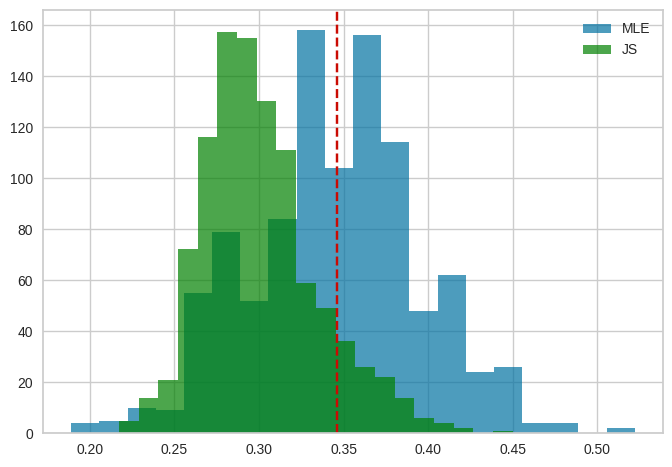

In [ ]:
plt.hist(np.array(p_star_list)[1], alpha=0.7, label = 'MLE', bins=20)
plt.hist(np.array(pp)[:,1], label='JS' , alpha=0.7, color="green", bins=20 )
plt.axvline(0.346 , c='r', linestyle = 'dashed')
plt.legend()

# 疑問点のシミュレーション


## * JS推定量は図7.1によると平均から離れれば離れるほど縮小が強い。なぜ？

In [ ]:
generator = np.random.default_rng()
rnd = generator.normal(loc=0, scale=1, size=100)

NameError: ignored

In [ ]:
rnd

In [ ]:
np.linalg.norm(rnd)**2

In [ ]:
Y = 1 - (100-2)/np.linalg.norm(rnd)**2

In [ ]:
Y

p124で$\hat{\beta}.TS\hat{\beta}$が大きいと分散$\sigma^2$もおきくなる

In [ ]:
generator = np.random.default_rng()
rnd = generator.normal(loc=0, scale=10, size=100)

In [ ]:
Y = 1 - (100-2)*100/np.linalg.norm(rnd)**2

In [ ]:
Y

平均が0、分散が大、小比べると、倍率も0に近くなるよになっているが、(p-2)の部分で少し値が残るようになり、分散が大だとβ^が大きいので見かけ上かなり縮小されるように見える。一方で分散が小だとβ^が小さいので見かけ上あまり縮小されないように見える。


分散が固定なんだからそもそも倍率はそれぞれ同じで、βが大きいほど見かけの縮小は強くなる

## P124 (7.43) でJS推定量の倍率は負になるのか。
$\hat{\beta}^{JS}=[1-(p-2)\sigma^2/(\hat{\beta}^TS\hat{\beta}）] $

In [ ]:
generator = np.random.default_rng()

In [ ]:
p = 10
var = 1
lam = 0.1

In [ ]:
beta = generator.normal(loc=0, scale=var/lam, size=p)
beta_hat = generator.normal(loc=, scale=var/lam, size=p)